<H1><center>Project - Data Visualization</center></H1>
<h4><center>Jelena Mitrovic</center></h4>
<center>August 2020</center>

As a part of Data Visualization project in Data Analyst Nanodegree program at Udacity I will download and read dataset related to Loan Data from Prosper. I will explore different variables to be able to determine which factors affect a loan’s outcome status and borrower rate. 

<h2>Univariate Visualization</h2>

First, I'll be looking at the distribution of LoanStatus by showing frequencies of each category.

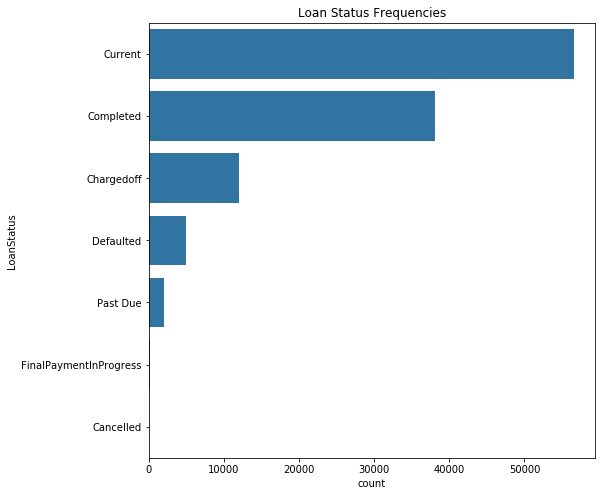

In [39]:
fig, ax = plt.subplots(nrows=1, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'LoanStatus', color = default_color, ax = ax)
plt.title('Loan Status Frequencies')

plt.show()

Also, I will continue doing that by taking different categorical variables.

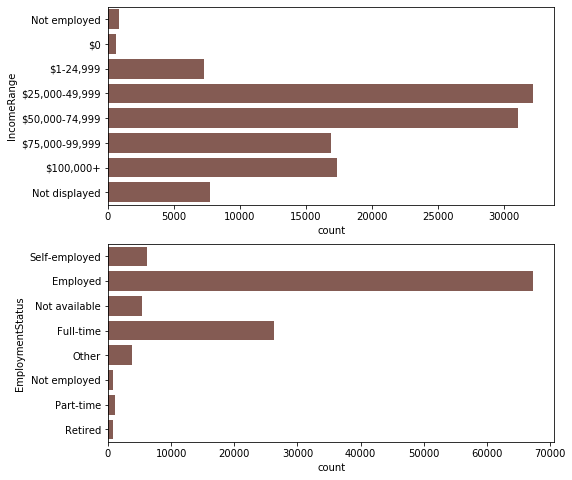

In [26]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sns.color_palette()[5]
sns.countplot(data = df, y = 'IncomeRange', color = default_color, ax = ax[0])
sns.countplot(data = df, y = 'EmploymentStatus', color = default_color, ax = ax[1])

plt.show()

Now, I will check the distribution of three numerical variables - 'BorrowerRate', 'Investors', and 'LoanOriginalAmount'.

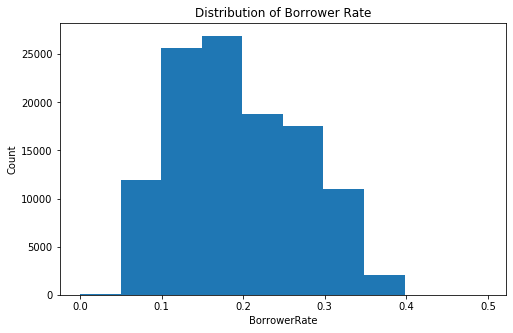

In [40]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate')
plt.show()

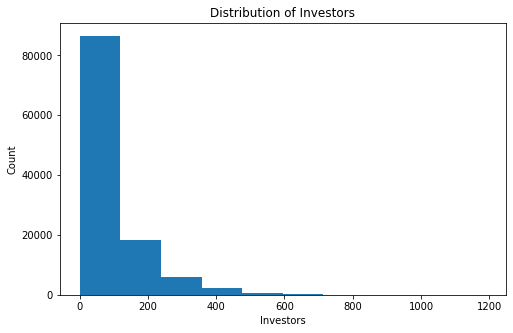

In [41]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors')
plt.xlabel('Investors')
plt.ylabel('Count')
plt.title('Distribution of Investors')
plt.show()

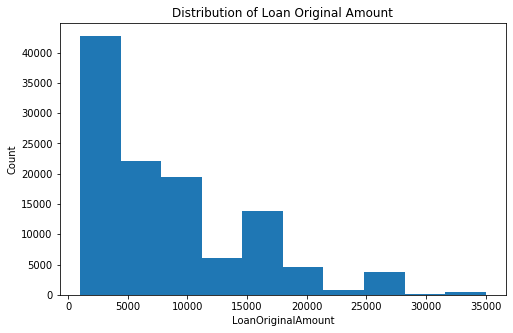

In [42]:
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.show()

<h2> Bivariate Visualization</h2>

After exploring each variable separately, I will now perform different combination of 2 variables.

I will use the violin graph to see the relationship between BorrowerRate and IncomeRange variables. It seems that the higher the income range the smaller the borrower rate.

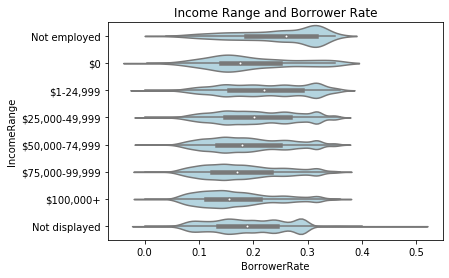

In [50]:
sns.violinplot(data = df, x = 'BorrowerRate', y = 'IncomeRange', color = 'lightblue')
plt.title('Income Range and Borrower Rate');

Here, I will use seaborn countplot to see the relationship between IncomeRange and LoanStatus. According to the graph, the majority of people with current loan fall in between 25k and 75k income range. The highest number of completed loans falls into category of people with income range from 25k to 50k.

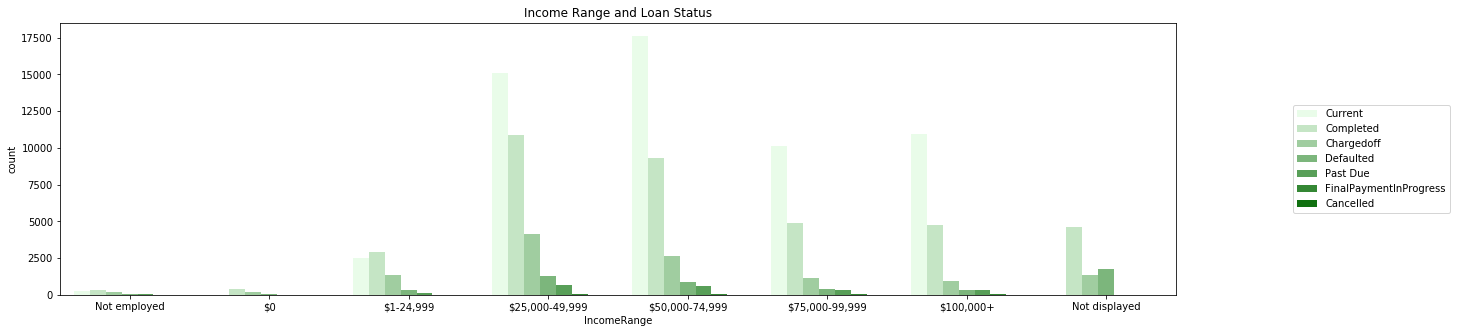

In [51]:
plt.figure(figsize=(20,5))
g = sns.countplot(data = df, x = 'IncomeRange', hue = 'LoanStatus', color = 'green')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Income Range and Loan Status');

Now I will show the relationship between the number of investors and borrower rate. The highest number of investors is for loans with borrower rate between 0.1 and 0.2. 

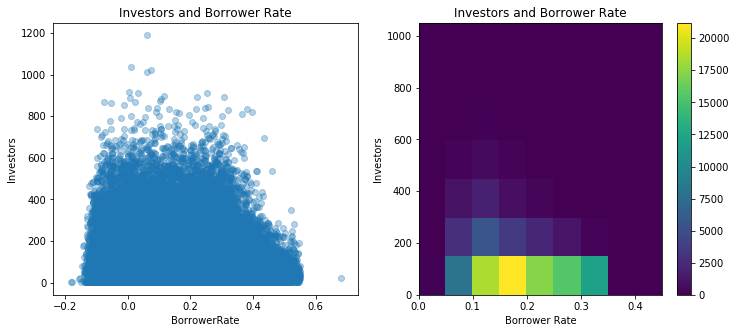

In [45]:
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'BorrowerRate', y = 'Investors', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title('Investors and Borrower Rate')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, 0.5, 0.05)
bins_y = np.arange(0, 1200, 150)
plt.hist2d(data = df, x = 'BorrowerRate', y = 'Investors',
           bins = [bins_x, bins_y])
plt.title('Investors and Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Investors')
plt.colorbar();

I will bring into relationship the amount of loan with income range by using box plot. It seems that the higher the income the bigger the loan amount. 

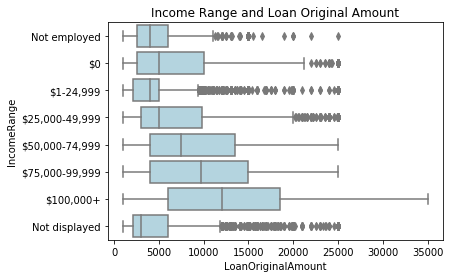

In [52]:
sns.boxplot(data = df, x = 'LoanOriginalAmount', y = 'IncomeRange', color = 'lightblue')
plt.title('Income Range and Loan Original Amount');

<h2> Multivariate Visualization</h2>

Here, I will combine more than 2 variables to see their relationship.

Since the graph is not easily readable, I will perform different ones.

/Users/jelenamitrovic/anaconda2/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


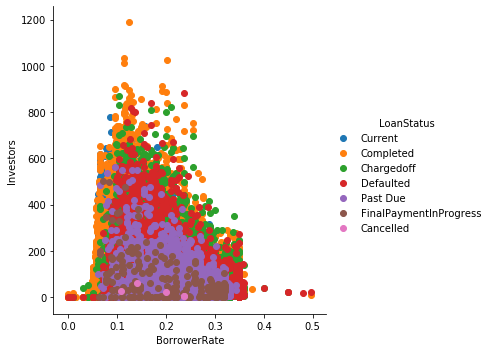

In [19]:
m = sns.FacetGrid(data = df, hue = 'LoanStatus', size = 5)
m.map(plt.scatter, 'BorrowerRate', 'Investors')
m.add_legend()

The highest number of investors is related to income range between 50k and 75k while the most frequently the borrower rate is 0.2

/Users/jelenamitrovic/anaconda2/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

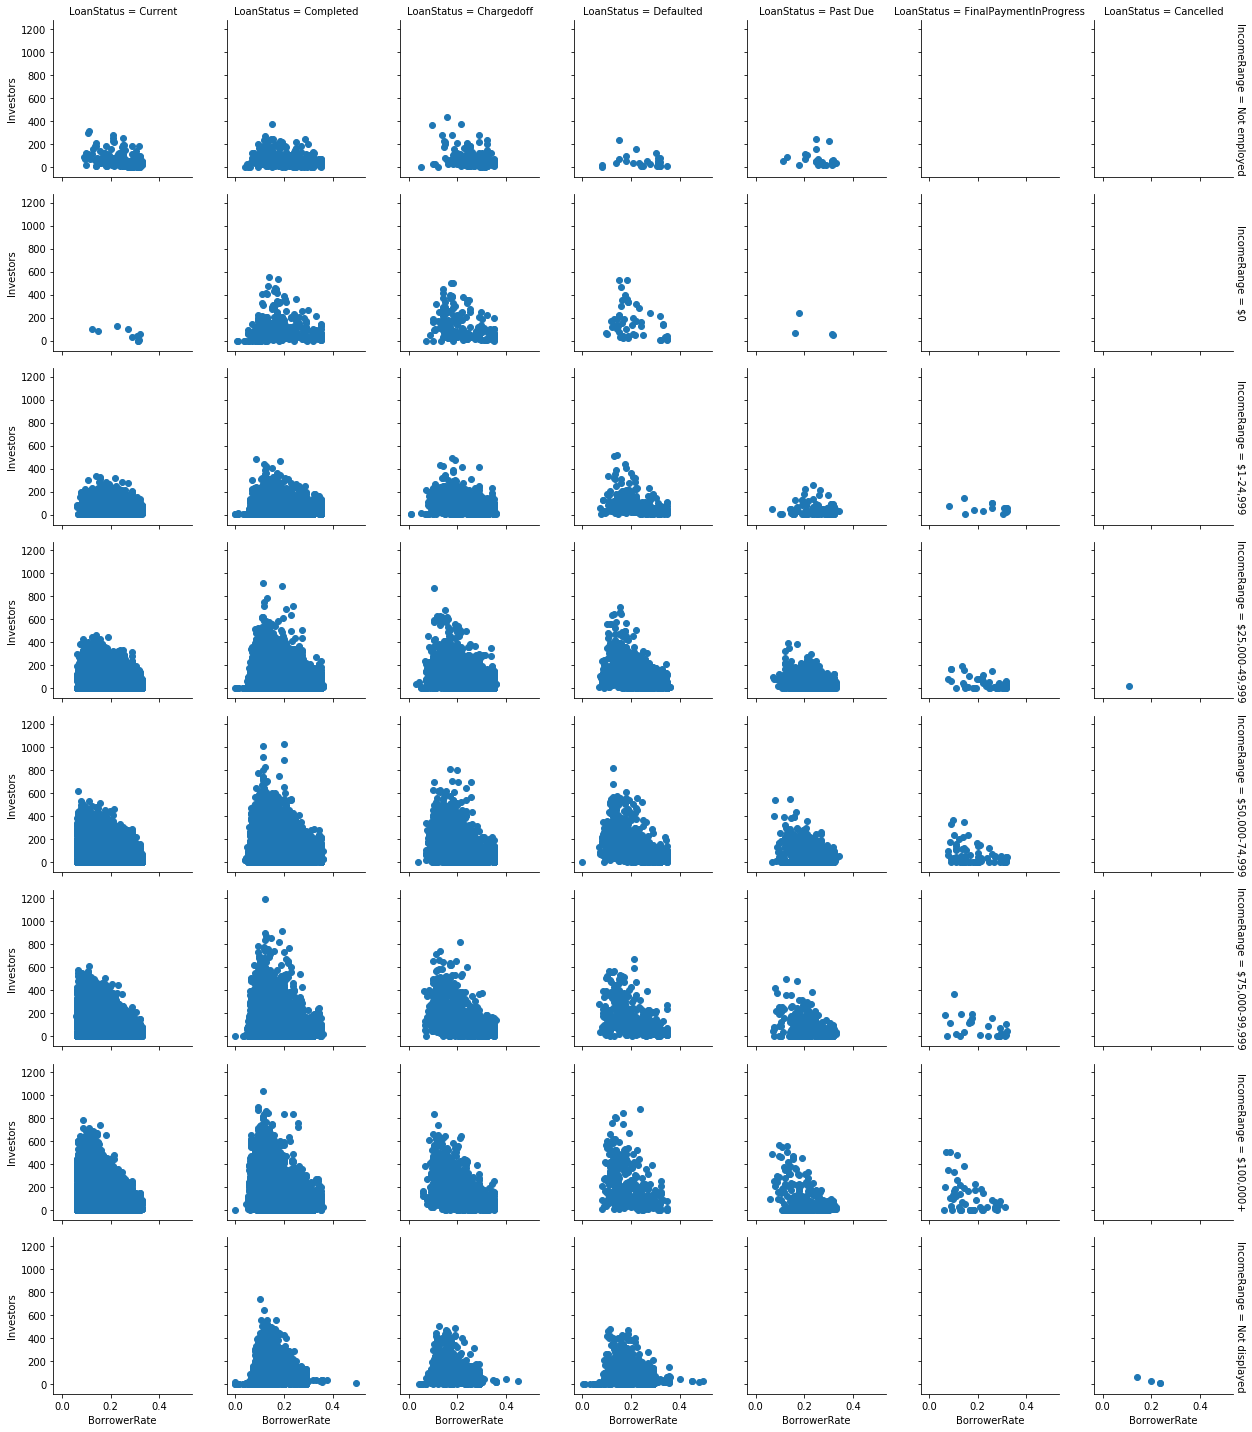

In [27]:
plt.figure(figsize=(8,5))

f = sns.FacetGrid(data = df, col = 'LoanStatus', row = 'IncomeRange', size = 2.5,
                margin_titles = True)
f.map(plt.scatter, 'BorrowerRate', 'Investors')

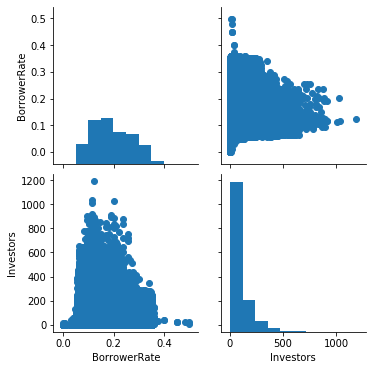

In [21]:
p = sns.PairGrid(data = df, vars = ['BorrowerRate', 'Investors'])
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)

<Figure size 864x864 with 0 Axes>

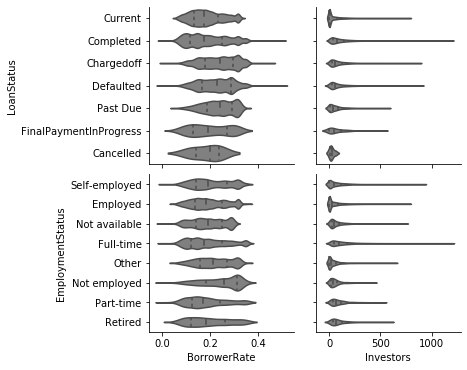

In [22]:
plt.figure(figsize = [12, 12])
pg = sns.PairGrid(data = df, x_vars = ['BorrowerRate', 'Investors'],
                y_vars = ['LoanStatus','EmploymentStatus'])
pg.map(sns.violinplot, color='gray', inner = 'quartile')

People with the highest number of current loans fall into income range category between 50k and 75k, while completed loans are the highest for people between 25k and 50k income range.

The current loans are the highest for people who are employed, while completed loans are the highest for people who are full-time employed.

Out of people who are employed there most of them fall into income range category of 50k-70k, while people who are full-time employed have 35k-50k per year.

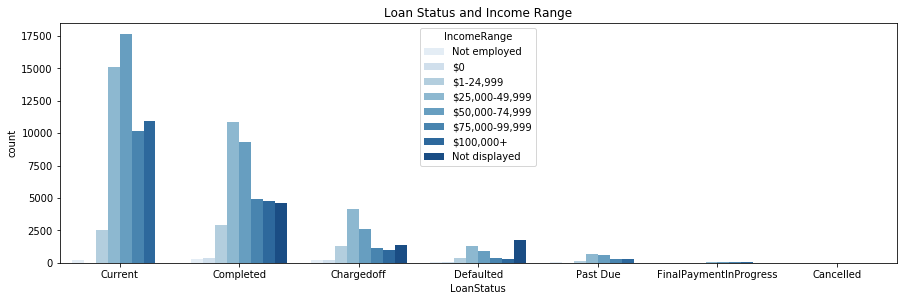

In [53]:
plt.figure(figsize = [15, 15])

# subplot 1: LoanStatus vs IncomeRange
plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.title('Loan Status and Income Range');



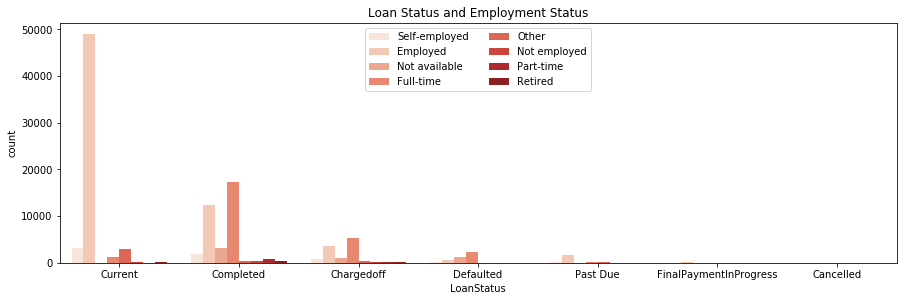

In [54]:
#subplot 2: LoanStatus vs. EmploymentStatus
plt.figure(figsize = [15, 15])
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.title('Loan Status and Employment Status');



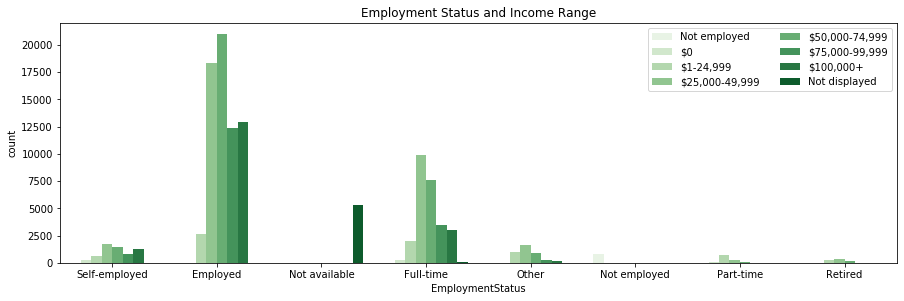

In [55]:
# subplot 3: EmploymentStatus vs. IncomeRange
plt.figure(figsize = [15, 15])
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(ncol = 2) 
plt.title('Employment Status and Income Range');

plt.show()

The number of investors increases with the loan amount for people who are full-time employed, while for retirees or part-time workers both the number of investors and the amount of loan are lower.

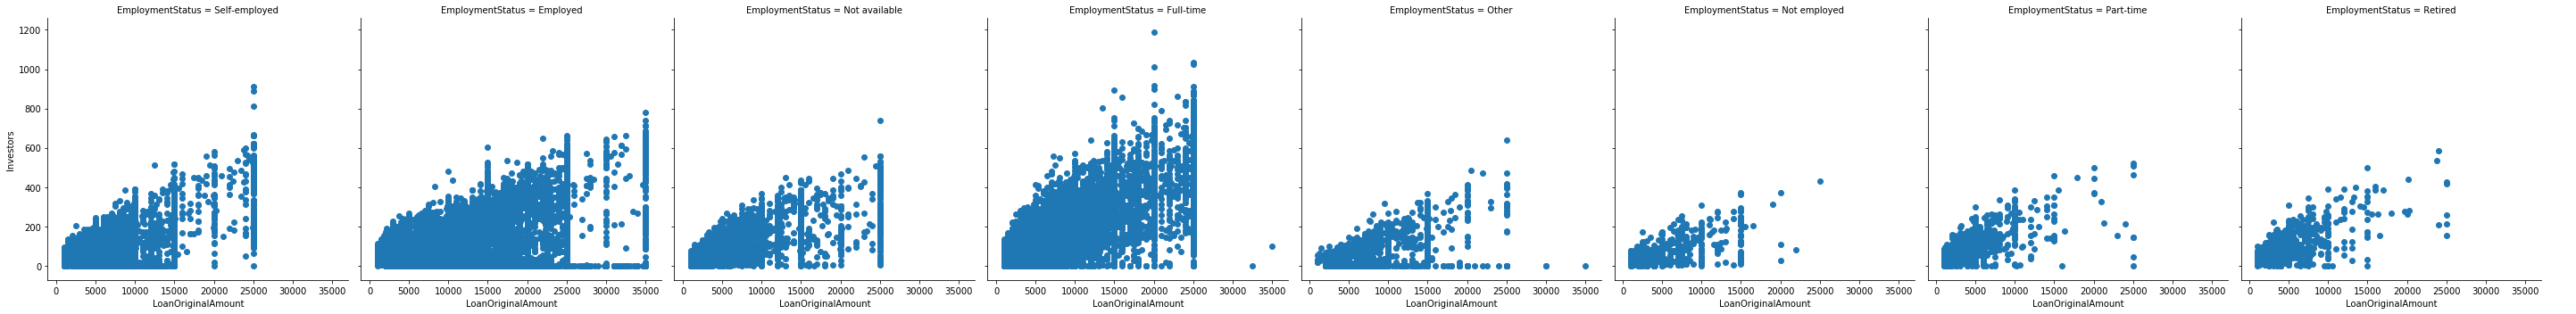

In [58]:
r = sns.FacetGrid(data = df, col = 'EmploymentStatus', size = 5,
                 palette = 'colorblind')
r.map(plt.scatter, 'LoanOriginalAmount', 'Investors');
r.add_legend();

<h2>Conclusion</h2>

The exploratory data analysis showed that the investors trust the established borrowers rates and are more willing to invest in lower rate loans. On the other hand, people with lower income tend to have more active loans, and by extension more paid-off loans. The loan amounts tend to be higher for employed higher earners, which also attract more investors. Finally, employed people tend to have more active loans, and the full-time employed people are more likely to pay off the loans. 

<h1><center>Thank you for your attention!</center></h1>